In [1196]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, matthews_corrcoef
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

In [1197]:
ls

 Volume in drive C is Windows
 Volume Serial Number is 0412-1423

 Directory of C:\Users\RASULEVLAB\Dropbox\mis_modelos\LDA

09/27/2023  11:17 AM    <DIR>          .
09/22/2023  12:22 AM    <DIR>          ..
09/26/2023  02:43 PM    <DIR>          .ipynb_checkpoints
09/07/2023  07:54 AM           127,104 1_9_05_2023.ipynb
09/27/2023  11:17 AM           196,062 25_1_sep.ipynb
09/26/2023  02:56 PM            22,980 25_2_2023.ipynb
09/25/2023  05:28 PM               617 25_2_LDA.ipynb
09/27/2023  09:12 AM            95,447 25_sep_LDA.ipynb
09/05/2023  03:42 PM            53,291 3_Modelo_KNN_Optimizado.ipynb
09/04/2023  11:01 AM             5,861 Array.ipynb
09/07/2023  07:56 AM            22,434 Clasification.ipynb
09/25/2023  10:50 AM           512,527 data_DNA.csv
09/03/2023  01:08 PM         7,699,276 Data_LDA.csv
09/02/2023  09:52 AM         1,832,168 Data_LDA.xlsb
09/25/2023  11:36 AM            14,752 Lazzy_LDA.ipynb
09/05/2023  07:37 AM           126,641 Lineal_Discriminant.ipynb
09

In [1198]:
#esta es la nueva data con la que trabajare
pd.read_csv("Data_DNA.csv")
data = pd.read_csv("Data_DNA.csv")
data.head(5)

,n-pair,q-seq,r-seq,eq(obs),eqpred,p(eq=1),prediction_trainig,eref,Dq0_Seq,Dq1_Seq,Dq2_Seq
0,1,RL2F_267,Control_1043,1,1,0.736,training,-0.419,-2.211,-2.154,-2.144
1,18,RL2F_267,RL2F_479,1,1,0.735,training,2.384,-2.211,-2.154,-2.144
2,27,RL2F_693,Control_0650,1,1,0.964,training,-0.419,-2.461,-2.425,-2.420
3,47,RL2F_693,RL2F_458,1,1,0.964,training,2.384,-2.461,-2.425,-2.420
4,51,RL2F_559,RL1F_021,1,0,0.187,prediction,2.384,-1.744,-1.734,-1.731


In [1199]:
data["prediction_trainig"] = data["prediction_trainig"].str.strip()
print(len(data[data["prediction_trainig"] == "training"]))
print(len(data[data["prediction_trainig"] == "prediction"]))

5440
1360


In [1200]:
Y= data.iloc[:,3]
X = data.iloc[:, 7:]

In [1201]:
train_data = data[data["prediction_trainig"] == "training"]
pred_data = data[data["prediction_trainig"] == "prediction"]

In [1202]:
#decision tree model
X_train_tree= train_data.iloc[:, 7:]
X_val_tree= pred_data.iloc[:, 7:]
y_train_tree= train_data.iloc[:, 3]
y_val_tree= pred_data.iloc[:, 3]

print(X_val_tree.shape)
print(X_train_tree.shape)
print(y_val_tree.shape)
print(y_train_tree.shape)

(1360, 4)
(5440, 4)
(1360,)
(5440,)


In [1203]:
#Ramdon_forest_model
X_train_forest= train_data.iloc[:, 7:]
X_val_forest = pred_data.iloc[:, 7:]
y_train_forest= train_data.iloc[:, 3]
y_val_forest= pred_data.iloc[:, 3]

print(X_val_forest.shape)
print(X_train_forest.shape)
print(y_val_forest.shape)
print(y_train_forest.shape)

(1360, 4)
(5440, 4)
(1360,)
(5440,)


In [1204]:
#knn_model
X_train_knn= train_data.iloc[:, 7:]
X_val_knn = pred_data.iloc[:, 7:]
y_train_knn= train_data.iloc[:, 3]
y_val_knn= pred_data.iloc[:, 3]

print(X_val_knn.shape)
print(X_train_knn.shape)
print(y_val_knn.shape)
print(y_train_knn.shape)

(1360, 4)
(5440, 4)
(1360,)
(5440,)


In [1205]:
mlr_X_train_tree= X_train_tree[['eref', 'Dq0_Seq', 'Dq1_Seq','Dq2_Seq']]
mlr_X_val_tree = X_pred_tree[['eref', 'Dq0_Seq', 'Dq1_Seq','Dq2_Seq']]

In [1206]:
mlr_X_train_forest= X_train_forest[['eref', 'Dq0_Seq', 'Dq1_Seq','Dq2_Seq']]
mlr_X_val_forest = X_pred_forest[['eref', 'Dq0_Seq', 'Dq1_Seq','Dq2_Seq']]

In [1207]:
mlr_X_train_knn= X_train_knn[['eref', 'Dq0_Seq', 'Dq1_Seq','Dq2_Seq']]
mlr_X_val_knn= X_pred_knn[['eref', 'Dq0_Seq', 'Dq1_Seq','Dq2_Seq']]

In [1208]:
random_seed = 42

In [1209]:
param_grid = {
    'max_depth': range(1, 30),  # Rango de profundidades máximas de 1 a 20
    'min_samples_split': range(2, 13),  # Rango de mínimo de muestras para dividir de 2 a 10
    'min_samples_leaf': range(1, 6)  # Rango de mínimo de muestras en hoja de 1 a 4
}

In [1210]:
# Crea el clasificador DecisionTree
classifier = DecisionTreeClassifier()

In [1211]:
# Realiza la búsqueda de hiperparámetros utilizando GridSearchCV
grid_search_tree = GridSearchCV(classifier, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

In [1212]:
# create a decision tree model and fit on the train set
tree = DecisionTreeClassifier()
grid_search_tree.fit(mlr_X_train_tree, y_train_tree) #Este es el fit 

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'max_depth': range(1, 30),
                         'min_samples_leaf': range(1, 6),
                         'min_samples_split': range(2, 13)},
             scoring='accuracy')

In [1213]:
print("Mejores hiperparámetros encontrados:")
print(grid_search_tree.best_params_)

Mejores hiperparámetros encontrados:
{'max_depth': 5, 'min_samples_leaf': 5, 'min_samples_split': 8}


In [1214]:
# Obtener el mejor modelo
best_tree_model = grid_search.best_estimator_

In [1215]:
y_pred_tree = best_tree_model.predict(X_pred_forest) #Utilizo esta 

In [1216]:
#Optimizo mi modelos Ramdom Classifier

In [1217]:
random_forest_model = RandomForestClassifier(random_state=42)

In [1218]:
param_grid = {
    'n_estimators': [50, 300],  # Número de árboles en el bosque
    'max_depth': [None, 5, 10],  # Profundidad máxima de cada árbol
    'min_samples_split': [2, 5, 10, 20],  # Número mínimo de muestras requeridas para dividir un nodo
    'min_samples_leaf': [1, 2, 4, 6]  # Número mínimo de muestras requeridas en un nodo hoja
}

In [1219]:
grid_search_rf = GridSearchCV(estimator=random_forest_model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

In [1220]:
# create a random forest model and fit on the train set
forest = RandomForestClassifier()
grid_search_rf.fit(mlr_X_train_forest, y_train_forest)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 5, 10],
                         'min_samples_leaf': [1, 2, 4, 6],
                         'min_samples_split': [2, 5, 10, 20],
                         'n_estimators': [50, 300]},
             scoring='accuracy')

In [1221]:
# Imprime los mejores hiperparámetros encontrados
print("Mejores hiperparámetros encontrados:")
print(grid_search_rf.best_params_)

Mejores hiperparámetros encontrados:
{'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 20, 'n_estimators': 50}


In [1222]:
# Obtener el mejor modelo
best_forest_model = grid_search.best_estimator_

In [1223]:
y_pred_forest = best_forest_model.predict(X_pred_forest) #Utilizo esta 

In [1224]:
#Optimizo mi modelos KNN 

In [1225]:
# Definir la cuadrícula de hiperparámetros
# Defino una cuadrícula de hiperparámetros para buscar
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11, 13],  # Diferentes valores para el número de vecinos
    'weights': ['uniform', 'distance'],  # Diferentes métodos de ponderación
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],  # Algoritmos para KNN
    'p': [1, 2],  # 1 para distancia Manhattan, 2 para distancia Euclidiana
}

In [1226]:
# Configurar la búsqueda de cuadrícula con validación cruzada (CV)
grid_search_knn = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

In [1227]:
# create a knn model and fit on the train set
knn = KNeighborsClassifier()
grid_search_knn.fit(mlr_X_train_knn, y_train_knn)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'n_neighbors': [3, 5, 7, 9, 11, 13], 'p': [1, 2],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [1228]:
print("Mejores hiperparámetros para KNN:")
print(grid_search.best_params_)

Mejores hiperparámetros para KNN:
{'n_neighbors': 3, 'p': 2, 'weights': 'uniform'}


In [1229]:
# Obtener el mejor modelo
best_knn_model = grid_search.best_estimator_

In [1230]:
y_pred_knn = best_knn_model.predict(X_pred_tree) #Utilizo esta 

In [1231]:
# make predictions on the train set
y_pred_train_tree = best_tree_model.predict(mlr_X_train_tree)  
y_pred_train_forest = best_forest_model.predict(mlr_X_train_forest) 
y_pred_train_knn = best_knn_model.predict(mlr_X_train_knn) 

In [1232]:
# calculate confusion matrices
cm_tree_train = confusion_matrix(y_train_tree, y_pred_train_tree)
cm_forest_train = confusion_matrix(y_train_forest, y_pred_train_forest)
cm_knn_train = confusion_matrix(y_train_knn, y_pred_train_knn)

In [1233]:
# calculate performance metrics
tn_tree, fp_tree, fn_tree, tp_tree = cm_tree_train.ravel()
tn_forest, fp_forest, fn_forest, tp_forest = cm_forest_train.ravel()
tn_knn, fp_knn, fn_knn, tp_knn = cm_knn_train.ravel()

In [1234]:
specificity_tree_train = tn_tree / (tn_tree + fp_tree)
sensitivity_tree_train = tp_tree / (tp_tree + fn_tree)
accuracy_tree_train = (tp_tree + tn_tree) / (tp_tree + tn_tree + fp_tree + fn_tree)
false_positive_tree_train = fp_tree / (fp_tree + tn_tree)

In [1235]:
specificity_forest_train = tn_forest / (tn_forest + fp_forest)
sensitivity_forest_train = tp_forest / (tp_forest + fn_forest)
accuracy_forest_train = (tp_forest + tn_forest) / (tp_forest + tn_forest + fp_forest + fn_forest)
false_positive_forest_train = fp_forest / (fp_forest + tn_forest)

In [1236]:
specificity_knn_train = tn_knn / (tn_knn + fp_knn)
sensitivity_knn_train = tp_knn / (tp_knn + fn_knn)
accuracy_knn_train = (tp_knn + tn_knn) / (tp_knn + tn_knn + fp_knn + fn_knn)
false_positive_knn_train = fp_knn / (fp_knn + tn_knn)

In [1237]:
mcc_tree = matthews_corrcoef(y_train_tree, y_pred_train_tree )
mcc_forest = matthews_corrcoef(y_train_forest, y_pred_train_forest)
mcc_knn = matthews_corrcoef(y_train_knn, y_pred_train_knn)

In [1238]:
# make predictions on the val set
y_pred_valid_tree = best_tree_model.predict(mlr_X_val_tree )  
y_pred_valid_forest = best_forest_model.predict(mlr_X_val_forest) 
y_pred_valid_knn = best_knn_model.predict(mlr_X_val_forest) 

In [1239]:
# calculate confusion matrices
cm_val_tree=confusion_matrix(y_val_tree, y_pred_valid_tree)
cm_val_forest=confusion_matrix(y_val_forest, y_pred_valid_forest)
cm_val_knn=confusion_matrix(y_val_knn, y_pred_valid_forest)

In [1240]:
# calculate performance metrics on test set
tn_tree_p, fp_tree_p, fn_tree_p, tp_tree_p = cm_val_tree.ravel()
tn_forest_p, fp_forest_p, fn_forest_p, tp_forest_p = cm_val_forest.ravel()
tn_knn_p, fp_knn_p, fn_knn_p, tp_knn_p = cm_val_knn.ravel()

In [1241]:
specificity_tree_val = tn_tree_p / (tn_tree_p + fp_tree_p)
sensitivity_tree_val = tp_tree_p / (tp_tree_p + fn_tree_p)
accuracy_tree_val = (tp_tree_p + tn_tree_p) / (tp_tree_p + tn_tree_p + fp_tree_p + fn_tree_p)
false_positive_tree_val = fp_tree_p / (fp_tree_p + tn_tree_p) #revisar aqui

In [1242]:
specificity_forest_val = tn_forest_p / (tn_forest_p + fp_forest_p)
sensitivity_forest_val = tp_forest_p / (tp_forest_p + fn_forest_p)
accuracy_forest_val = (tp_forest_p + tn_forest_p) / (tp_forest_p + tn_forest_p + fp_forest_p + fn_forest_p)
false_positive_forest_val = fp_forest_p / (fp_forest_p + tn_forest_p)

In [1243]:
specificity_knn_val = tn_knn_p / (tn_knn_p + fp_knn_p)
sensitivity_knn_val = tp_knn_p / (tp_knn_p + fn_knn_p)
accuracy_knn_val = (tp_knn_p + tn_knn_p) / (tp_knn_p + tn_knn_p + fp_knn_p + fn_knn_p)
false_positive_knn_val = fp_knn_p / (fp_knn_p + tn_knn_p)

In [1244]:
mcc_tree_val = matthews_corrcoef(y_val_tree, y_pred_valid_tree)
mcc_forest_val = matthews_corrcoef(y_val_forest, y_pred_valid_forest)
mcc_knn_val = matthews_corrcoef(y_val_knn, y_pred_valid_knn)

In [1245]:
# create a bar plot of the performance metrics for each classifier for the training and test sets
labels = ['Accuracy', 'Specificity', 'Sensitivity','1-False\nPositive\nRate','MCC']
tree_train_values = [accuracy_tree_train,specificity_tree_train,sensitivity_tree_train,1-false_positive_tree_train,mcc_tree]
forest_train_values = [accuracy_forest_train, specificity_forest_train, sensitivity_forest_train, 1-false_positive_forest_train, mcc_forest]
knn_train_values = [accuracy_knn_train, specificity_knn_train,sensitivity_knn_train, 1-false_positive_knn_train,mcc_knn]

In [1246]:
tree_val_values= [accuracy_tree_val, specificity_tree_val, sensitivity_tree_val, 1-false_positive_tree_val, mcc_tree_val]
forest_val_vaues= [accuracy_forest_val, specificity_forest_val, sensitivity_forest_val, 1-false_positive_forest_val,mcc_forest_val]
knn_val_values=[accuracy_tree_val, specificity_tree_val, sensitivity_tree_val, 1-false_positive_tree_val, mcc_tree_val]

In [1247]:
x = np.arange(len(labels))  # the label locations
width = 0.2  # the width of the bars

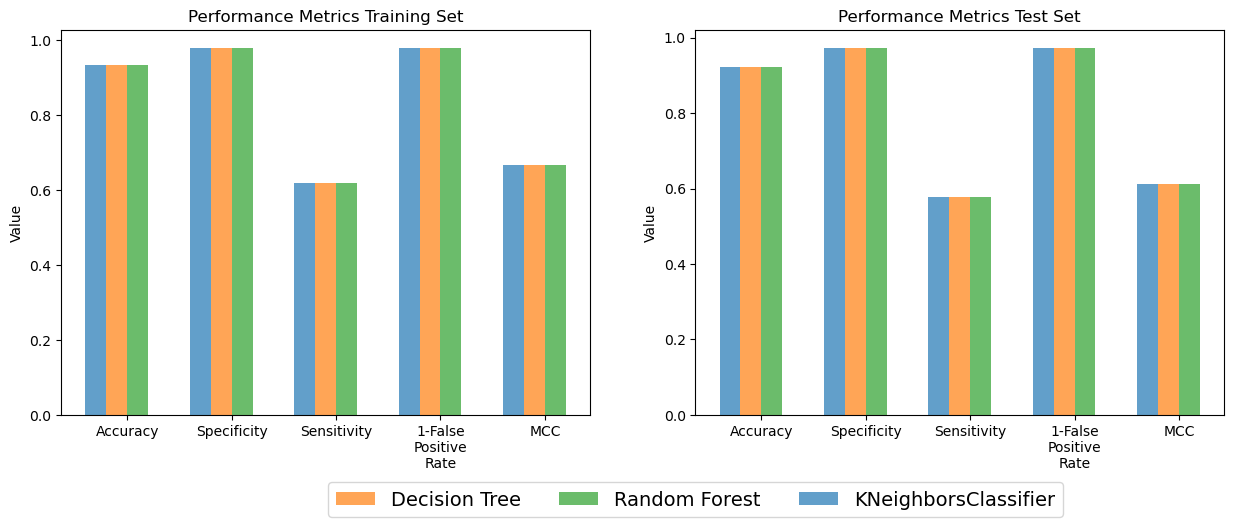

In [1248]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# plot the performance metrics for the training set
rects1 = ax1.bar(x, tree_train_values, width, label='Decision Tree', color='tab:orange',alpha=0.7)
rects2 = ax1.bar(x + width, forest_train_values, width, label='Random Forest', color='tab:green',alpha=0.7)
rects3 = ax1.bar(x - width, knn_train_values, width, label='KNN', color='tab:blue',alpha=0.7)

ax1.set_ylabel('Value')
ax1.set_title('Performance Metrics Training Set')
ax1.set_xticks(x + width / 2)
ax1.set_xticklabels(labels)
#ax1.legend()

# plot the performance metrics for the val set
rects1 = ax2.bar(x, tree_test_values, width, label='Decision Tree', color='tab:orange',alpha=0.7)
rects2 = ax2.bar(x + width, forest_test_values, width, label='Random Forest', color='tab:green',alpha=0.7)
rects3 = ax2.bar(x - width, knn_test_values, width, label='KNeighborsClassifier', color='tab:blue',alpha=0.7)

ax2.set_ylabel('Value')
ax2.set_title('Performance Metrics Test Set')
ax2.set_xticks(x + width / 2)
ax2.set_xticklabels(labels)
#ax2.legend()

plt.legend(loc='upper center', bbox_to_anchor=(0.0, -0.15), ncol=3,fontsize=14)
plt.show()

In [1249]:
from sklearn.metrics import roc_curve, auc

In [1250]:
# Predict probabilities for training set
probas_tree_train = best_tree_model.predict_proba(mlr_X_train_tree)[:, 1]
probas_forest_train = best_forest_model.predict_proba(mlr_X_train_forest)[:, 1]
probas_knn_train =  best_knn_model.predict_proba(mlr_X_train_knn)[:,1] 

In [1251]:
# Compute ROC curve and AUC for decision tree model
fpr_tree_train, tpr_tree_train, thresholds_tree_train = roc_curve(y_train_tree, probas_tree_train)
roc_auc_tree_train = auc(fpr_tree_train, tpr_tree_train)

In [1252]:
# Compute ROC curve and AUC for ramdom forest
fpr_rf_train, tpr_rf_train, thresholds_rf_train = roc_curve(y_train_forest, probas_forest_train)
roc_auc_rf_train = auc(fpr_rf_train, tpr_rf_train)

In [1253]:
# Compute ROC curve and AUC for knn model
fpr_knn_train, tpr_knn_train, thresholds_knn_train = roc_curve(y_train_knn, probas_knn_train)
roc_auc_knn_train = auc(fpr_knn_train, tpr_knn_train)

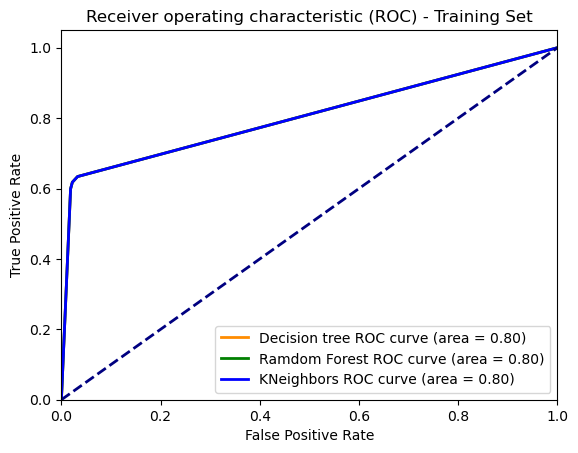

In [1254]:
# Plot ROC curves
# Plot ROC curves
plt.plot(fpr_tree_train, tpr_tree_train, color='darkorange', lw=2, label='Decision tree ROC curve (area = %0.2f)' % roc_auc_tree_train)
plt.plot(fpr_rf_train, tpr_rf_train, color='green', lw=2, label='Ramdom Forest ROC curve (area = %0.2f)' % roc_auc_rf_train)
plt.plot(fpr_knn_train, tpr_knn_train, color='blue', lw=2, label='KNeighbors ROC curve (area = %0.2f)' % roc_auc_knn_train)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) - Training Set')
plt.legend(loc="lower right")
plt.show()

In [1255]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [1256]:
# Función para graficar la matriz de confusión
def plot_confusion_matrix(y_train_tree, y_pred_train_tree, model_name):
    cm = confusion_matrix(y_train_tree, y_pred_train_tree)
    plt.figure(figsize=(3, 3))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title(f'Confusion Matrix - {model_name}')
    plt.show()

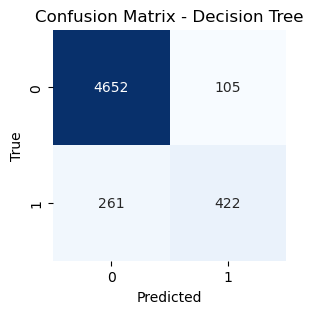

In [1257]:
# Graficar la matriz de confusión para Decision Tree
plot_confusion_matrix(y_train_tree, y_pred_train_tree, 'Decision Tree')

In [1258]:
# Función para graficar la matriz de confusión
def plot_confusion_matrix(y_train_forest, y_pred_train_forest, model_name):
    cm = confusion_matrix(y_train_forest, y_pred_train_forest)
    plt.figure(figsize=(3, 3))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title(f'Confusion Matrix - {model_name}')
    plt.show()

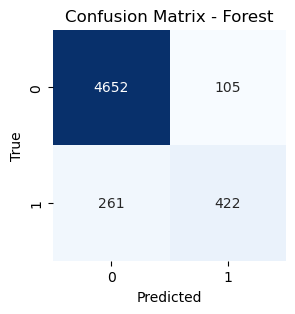

In [1259]:
# Graficar la matriz de confusión para Decision Tree
plot_confusion_matrix(y_train_forest, y_pred_train_forest, 'Forest')

In [1260]:
# Función para graficar la matriz de confusión
def plot_confusion_matrix(y_train_knn, y_pred_train_knn, model_name):
    cm = confusion_matrix(y_train_knn, y_pred_train_knn)
    plt.figure(figsize=(3, 3))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title(f'Confusion Matrix - {model_name}')
    plt.show()

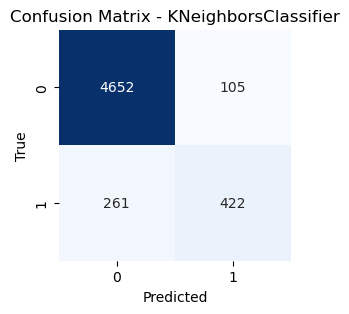

In [1192]:
# Graficar la matriz de confusión para Decision Tree
plot_confusion_matrix(y_train_knn, y_pred_train_knn, 'KNeighborsClassifier')